In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
dems = pd.read_csv('data/fivethirtyeight/dem_candidates.csv')
reps = pd.read_csv('data/fivethirtyeight/rep_candidates.csv', encoding = 'ISO-8859-1')

In [15]:
dems.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,...,Runoff Outcome,EMILY's List,Justice Dems,Indivisible,PCCC,Our Revolution,Sunrise,Sanders,AOC,Party Committee
0,Gavin Dass,Male,White,Asian (Indian),NaN,No,No,Texas,3/1/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Victor D. Dunn,Male,Black,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jrmar ""JJ"" Jefferson",Male,Black,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Won,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stephen Kocen,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Robin Fulford,Female,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
reps.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,...,2020 Election Stance,Trump,Trump Date,Club for Growth,Party Committee,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women
0,"Aditya ""A.D."" Atholi",Male,Asian (Indian),NaN,NaN,No,No,Texas,3/1/22,Representative,...,No comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Joe McDaniel,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Raised questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nathaniel Moran,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Raised questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,John Porro,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,No comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dan Crenshaw,Male,White,NaN,NaN,Yes,No,Texas,3/1/22,Representative,...,Accepted with reservations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dems.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', 'EMILY's List', 'Justice Dems',
       'Indivisible', 'PCCC', 'Our Revolution', 'Sunrise', 'Sanders', 'AOC',
       'Party Committee'],
      dtype='object')

In [18]:
reps.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', '2020 Election Stance', 'Trump',
       'Trump Date', 'Club for Growth', 'Party Committee', 'Renew America',
       'E-PAC', 'VIEW PAC', 'Maggie's List', 'Winning for Women'],
      dtype='object')

In [105]:
reps['Runoff Outcome'] = reps['Runoff Outcome'].map({'Lost': 0, 'Won': 1, np.NaN: 0})
reps['Final Outcome'] = reps['Primary Outcome'].map({'Lost': 0, 'Made runoff': 0, 'Won': 1})
reps['Final Outcome'] = np.array(reps['Final Outcome']) + np.array(reps['Runoff Outcome'])

In [106]:
reps['Final Outcome']

0       0
1       0
2       1
3       0
4       1
       ..
1594    0
1595    1
1596    1
1597    1
1598    0
Name: Final Outcome, Length: 1599, dtype: int64

In [148]:
reps_outcome = reps.groupby(['2020 Election Stance', 'Final Outcome']).count()
reps_outcome = reps_outcome.reset_index()[['2020 Election Stance', 'Final Outcome', 'Candidate']].rename(columns = {'Candidate': 'Count', 'Final Outcome': 'Won?'})

In [149]:
reps_outcome

,2020 Election Stance,Won?,Count
0,Accepted with reservations,0,38
1,Accepted with reservations,1,66
2,Avoided answering,0,37
3,Avoided answering,1,15
4,Fully accepted,0,92
5,Fully accepted,1,57
6,Fully denied,0,290
7,Fully denied,1,181
8,No comment,0,524
9,No comment,1,112


In [155]:
def density_win(row):
    if row['Won?'] == 0:
        return row['Count'] / np.count_nonzero(reps['Final Outcome'] == 0)
    elif row['Won?'] == 1:
        return row['Count'] / np.count_nonzero(reps['Final Outcome'])

In [156]:
reps_outcome['Proportion'] = reps_outcome[['Won?', 'Count']].apply(density_win, axis = 1)
reps_outcome

,2020 Election Stance,Won?,Count,Proportion
0,Accepted with reservations,0,38,0.034111
1,Accepted with reservations,1,66,0.136082
2,Avoided answering,0,37,0.033214
3,Avoided answering,1,15,0.030928
4,Fully accepted,0,92,0.082585
5,Fully accepted,1,57,0.117526
6,Fully denied,0,290,0.260323
7,Fully denied,1,181,0.373196
8,No comment,0,524,0.470377
9,No comment,1,112,0.230928


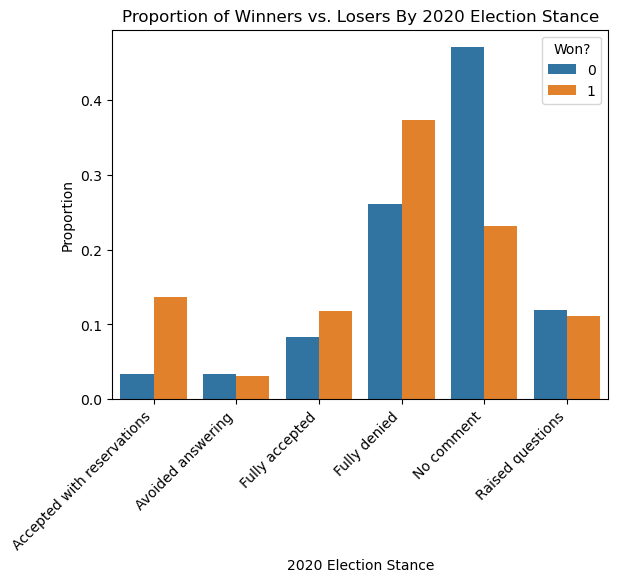

In [157]:
sns.barplot(data = reps_outcome, x = '2020 Election Stance', y = 'Proportion', hue = 'Won?')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Winners vs. Losers By 2020 Election Stance');

In [153]:
reps_incumbent = reps.groupby(['2020 Election Stance', 'Incumbent']).count()
reps_incumbent = reps_incumbent.reset_index()[['2020 Election Stance', 'Incumbent', 'Candidate']].rename(columns = {'Candidate': 'Count', 'Incumbent': 'Incumbent?'})

In [163]:
def density_incumbent(row):
    if row['Incumbent?'] == 'No':
        return row['Count'] / np.count_nonzero(reps['Incumbent'] == 'No')
    elif row['Incumbent?'] == 'Yes':
        return row['Count'] / np.count_nonzero(reps['Incumbent'] == 'Yes')

In [164]:
reps_incumbent['Proportion'] = reps_incumbent[['Incumbent?', 'Count']].apply(density_incumbent, axis = 1)
reps_incumbent

,2020 Election Stance,Incumbent?,Count,Proportion
0,Accepted with reservations,No,54,0.039046
1,Accepted with reservations,Yes,50,0.231481
2,Avoided answering,No,51,0.036876
3,Avoided answering,Yes,1,0.004630
4,Fully accepted,No,109,0.078814
5,Fully accepted,Yes,40,0.185185
6,Fully denied,No,357,0.258134
7,Fully denied,Yes,114,0.527778
8,No comment,No,633,0.457701
9,No comment,Yes,3,0.013889


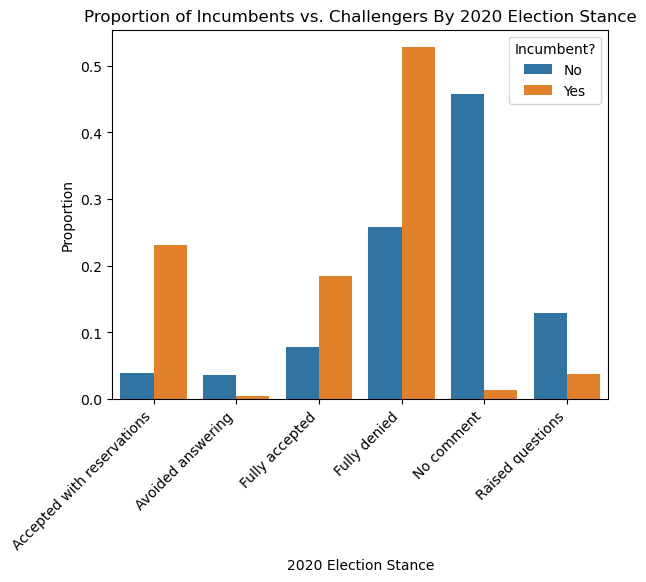

In [165]:
sns.barplot(data = reps_incumbent, x = '2020 Election Stance', y = 'Proportion', hue = 'Incumbent?')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Incumbents vs. Challengers By 2020 Election Stance');

Incumbency has no relationship with their stance on the 2020 election

1: normal TVD A/B test to see if the distributions are different 
2: A/B test for proportion of no comment 
3: A/B test for proportion of full deniers 

If they won the primary has no relationship with their stance on the 2020 election

4: normal TVD A/B test to see if distributions of stances are different from winners/losers
5: A/B test for proportion of no comment
6: A/B test for proportion of full deniers

In [170]:
dems['District'].value_counts()

1           86
2           77
4           67
3           66
10          50
6           48
7           46
5           44
8           36
13          28
12          25
11          23
9           23
15          18
17          15
14          14
16          13
30          12
21          11
23          11
At-Large    10
27           9
34           9
37           9
20           8
24           7
22           7
28           7
42           6
32           6
35           6
18           6
19           5
26           4
38           4
25           4
33           3
36           3
29           3
41           2
43           2
44           2
46           2
48           2
49           2
50           2
52           2
31           2
39           1
40           1
45           1
47           1
51           1
Name: District, dtype: int64

In [171]:
dems['Full District'] = dems['State'] + ' ' + dems['District']

In [175]:
reps['Full District'] = reps['State'] + ' ' + reps['District']

In [188]:
dems_by_district = pd.DataFrame(dems.groupby('Full District')['Candidate'].count()).reset_index()

In [189]:
reps_by_district = pd.DataFrame(reps.groupby('Full District')['Candidate'].count()).reset_index()
reps_by_district

,Full District,Candidate
0,Alabama 1,1
1,Alabama 2,1
2,Alabama 3,2
3,Alabama 4,1
4,Alabama 5,6
...,...,...
418,Wisconsin 5,1
419,Wisconsin 6,2
420,Wisconsin 7,2
421,Wisconsin 8,2


In [192]:
total_by_district = dems_by_district.merge(right = reps_by_district, how = 'left', on = 'Full District')
total_by_district

,Full District,Candidate_x,Candidate_y
0,Alabama 2,2,1.0
1,Alabama 3,1,2.0
2,Alabama 4,2,1.0
3,Alabama 5,2,6.0
4,Alabama 7,1,1.0
...,...,...,...
402,Wisconsin 3,4,1.0
403,Wisconsin 4,1,2.0
404,Wisconsin 5,1,1.0
405,Wisconsin 7,1,2.0


In [193]:
total_by_district['Total Candidates'] = total_by_district['Candidate_x'] + total_by_district['Candidate_y']
total_by_district

,Full District,Candidate_x,Candidate_y,Total Candidates
0,Alabama 2,2,1.0,3.0
1,Alabama 3,1,2.0,3.0
2,Alabama 4,2,1.0,3.0
3,Alabama 5,2,6.0,8.0
4,Alabama 7,1,1.0,2.0
...,...,...,...,...
402,Wisconsin 3,4,1.0,5.0
403,Wisconsin 4,1,2.0,3.0
404,Wisconsin 5,1,1.0,2.0
405,Wisconsin 7,1,2.0,3.0


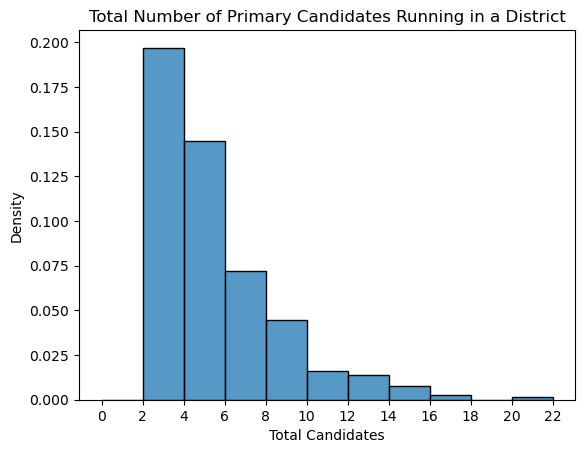

In [203]:
sns.histplot(data = total_by_district, x = 'Total Candidates', stat = 'density', bins = np.arange(0, 23, 2))
plt.xticks(np.arange(0, 23, 2))
plt.title('Total Number of Primary Candidates Running in a District');